<div style="background-color: #000000;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 30px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           👦 Face detection and Hand🖐️/Body🧍 Pose Detection have valuable applications in the robotics 🤖 field and AR/VR 🥽 technologies. <br><br> They suppose to enhance Human-Robot 🤝 Interaction, enable precise object manipulation, facilitate gesture-based control, and contribute to immersive AR/VR 🥽 experiences 🤓.
</h1>
</div>

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           ✏️ Things I've used:
</h1>
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: white;
               font-size: 13px">
            Mediapipe library for Body Pose Detection and Hand(Palm+Fingers+Thumb) Detection.
    </li>
    <li style="color: white;
               font-size: 13px">
            Used Haar Cascades Algorithm for Face Detection.
    </li>
    <li style="color: white;
               font-size: 13px">
            mpl_toolkits for plotting the results on a 3D plot.
    </li>
    
</ul>
</div>

In [ ]:
# Import the libraries
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Getting 2 mediapipe components
mp_pose = mp.solutions.pose  # for detecting the body pose
mp_hands = mp.solutions.hands  # for detecting the palm and fingers
mp_drawing = mp.solutions.drawing_utils

# Create the instance of pose class
pose = mp_pose.Pose()

# for face detection, using CascadeClassifier so creating an instance of it...
face_cascade = cv2.CascadeClassifier('raw.githubusercontent.com_opencv_opencv_master_data_haarcascades_haarcascade_frontalface_default.xml')

# Initialize the VideoCapture instance for capturing the object
cap = cv2.VideoCapture(0)

# Create a named window with the WINDOW_NORMAL Flag
cv2.namedWindow("Hand, Body Pose Detection + Face Detection", cv2.WINDOW_NORMAL)
window_width = 1080
window_height = 720
cv2.resizeWindow("Hand, Body Pose Detection + Face Detection", window_width, window_height)

# create a 3D plot
fig = plt.figure(dpi=180)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Rendering Results in 3D plot")

"""
Create a Hands object with the specified minimum detection and tracking confidences.

    >> min_detection_confidence: this parameter specifies the minimum confidence that a hand detection must have,
                                 in order to be considered valid
    >> min_tracking_confidence: this parameter specifies the minimum confidence that a hand tracking must have,
                                in order to be consider valid
"""
hands = mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5, max_num_hands=6)

while True:
    """
    Capture a frame from the VideoCapture device and assign it to 'img' variable
    The 'ret' variable will be True if the Frame is successfully read else 'False'
    """
    ret, frame = cap.read()

    # this CascadeClassifier works on GrayScale Images, so we need to convert our image from RGB to grayscale
    gray_scale_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ========================== For Drawing the Circle on Face =================
    faces = face_cascade.detectMultiScale(gray_scale_image, 1.1, 4)
    for (x, y, w, h) in faces:
        center_x = x + w // 2
        center_y = y + h // 2
        radius = min(w, h) // 2 + 10
        # cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        cv2.circle(frame, (center_x, center_y), radius - 4, (102, 204, 0), 4)
        cv2.circle(frame, (center_x, center_y), radius, (153, 0, 76), 4)

        z_circle = np.zeros_like(x)

    # ============================ Detections ===========================
    """
    Performing Image channels color conversion,
    Because when we get a feed from opencv, our image will be in BGR format and not RGB and...
    In order to work with mediapipe, we need to send that image to the detection model in RGB FORMAT.
    """
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Flip the image
    image = cv2.flip(image, 1)

    """
    Setting image.flags.writable to False makes the image array read-only.
        By doing so, it allows the underlying memory buffer to be shared across multiple process and functions...
        without creating a copy. This can improve performance and save memory when working with large images.
    """
    image.flags.writeable = False

    """The hands.process() method may modify the image during the detection process.
        By setting image.flags.writeable to False, before passing it to method, it ensures that...
        the image array is not modified in-place, which can have unexpected consequences.
    """
    hand_results = hands.process(image)  # this will make the hand detections
    entire_body_pose_results = pose.process(image)  # this will make the body pose detections

    # Clear the previous frame's data in the plot
    ax.clear()

    # Set the limits of the another plot
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([-0.5, 3])
    ax.set_zlim([1, -1.5])

    # Give the Label Names of the axis of another plot
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    """After the detection process is completed and results are obtained, the image.flags.writeable...
        is set back to True before converting the image back to BGR format.
        This allows the image array to be modified again, enabling conversion from RGB to BGR again.
    """
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    print(hand_results, entire_body_pose_results)

    # Show/Render the results in output
    if hand_results.multi_hand_landmarks:  # 1st checking whether we've encounter any results that is hand landmarks

        for num, hand in enumerate(hand_results.multi_hand_landmarks):  # loop through each one of the results(landmarks)

            # print(num, hand)  # we will get a set of landmarks on looping

            """
            >> 4th parameter specifies visual appearance of DRAWN LANDMARKS.
            >> 5th parameter specifies visual appearance of CONNECTIONS BETWEEN THE LANDMARKS
            """
            mp_drawing.draw_landmarks(image,
                                      hand,
                                      mp_hands.HAND_CONNECTIONS,
                                      landmark_drawing_spec=mp_drawing.DrawingSpec(color=(153, 0, 76), thickness=-1, circle_radius=4),
                                      connection_drawing_spec=mp_drawing.DrawingSpec(color=(102, 204, 0), thickness=2, circle_radius=2)
                                      )

        for hand_landmarks in hand_results.multi_hand_landmarks:
            # Getting the x, y, and z coordinates values obtained from HAND landmarks
            x_hand_coords = [landmark.x for landmark in hand_landmarks.landmark]
            y_hand_coords = [landmark.y for landmark in hand_landmarks.landmark]
            z_hand_coords = [landmark.x for landmark in hand_landmarks.landmark]

            # Plot the landmarks on the 3d plot
            ax.scatter3D(x_hand_coords, y_hand_coords, z_hand_coords, color='purple', s=10)

            # Plot the connections as lines
            for hand_connection in mp_hands.HAND_CONNECTIONS:
                start = hand_connection[0]
                end = hand_connection[1]
                ax.plot([x_hand_coords[start], x_hand_coords[end]],
                        [y_hand_coords[start], y_hand_coords[end]],
                        [z_hand_coords[start], z_hand_coords[end]], color='green', linewidth=2)
            # mp_hand.HAND_CONNECTIONS represents the set of coordinates

    # For drawing the Body Pose Detection Landmarks and Connections
    mp_drawing.draw_landmarks(image,
                              entire_body_pose_results.pose_landmarks,
                              mp_pose.POSE_CONNECTIONS,
                              landmark_drawing_spec=mp_drawing.DrawingSpec(color=(153, 0, 76), thickness=-1,
                                                                           circle_radius=4),
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(102, 204, 0), thickness=2,
                                                                             circle_radius=2)
                              )

    # Getting the x, y, and z coordinates values obtained from pose landmarks
    if entire_body_pose_results.pose_landmarks:
        x_coords = [landmark.x for landmark in entire_body_pose_results.pose_landmarks.landmark]
        y_coords = [landmark.y for landmark in entire_body_pose_results.pose_landmarks.landmark]
        z_coords = [landmark.z for landmark in entire_body_pose_results.pose_landmarks.landmark]

        # Plot the landmarks on the 3d plot
        ax.scatter3D(x_coords, y_coords, z_coords, color='purple', s=10)

        # Plot the connections as lines
        for connection in mp_pose.POSE_CONNECTIONS:
            start = connection[0]
            end = connection[1]
            ax.plot([x_coords[start], x_coords[end]],
                    [y_coords[start], y_coords[end]],
                    [z_coords[start], z_coords[end]], color='green', linewidth=2)

        # Plot the circle as a face indicator
        # ax.scatter(x_circle, y_circle, z_circle, color='green', s=4)

    # Display the 3D background plot
    plt.show(block=False)
    plt.pause(0.001)

    cv2.imshow("Hand, Body Pose Detection + Face Detection", image)

    # On pressing the escape key, the program execution will stop!
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()
cap.release()

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           💁🏼 Output
</h1>
</div>

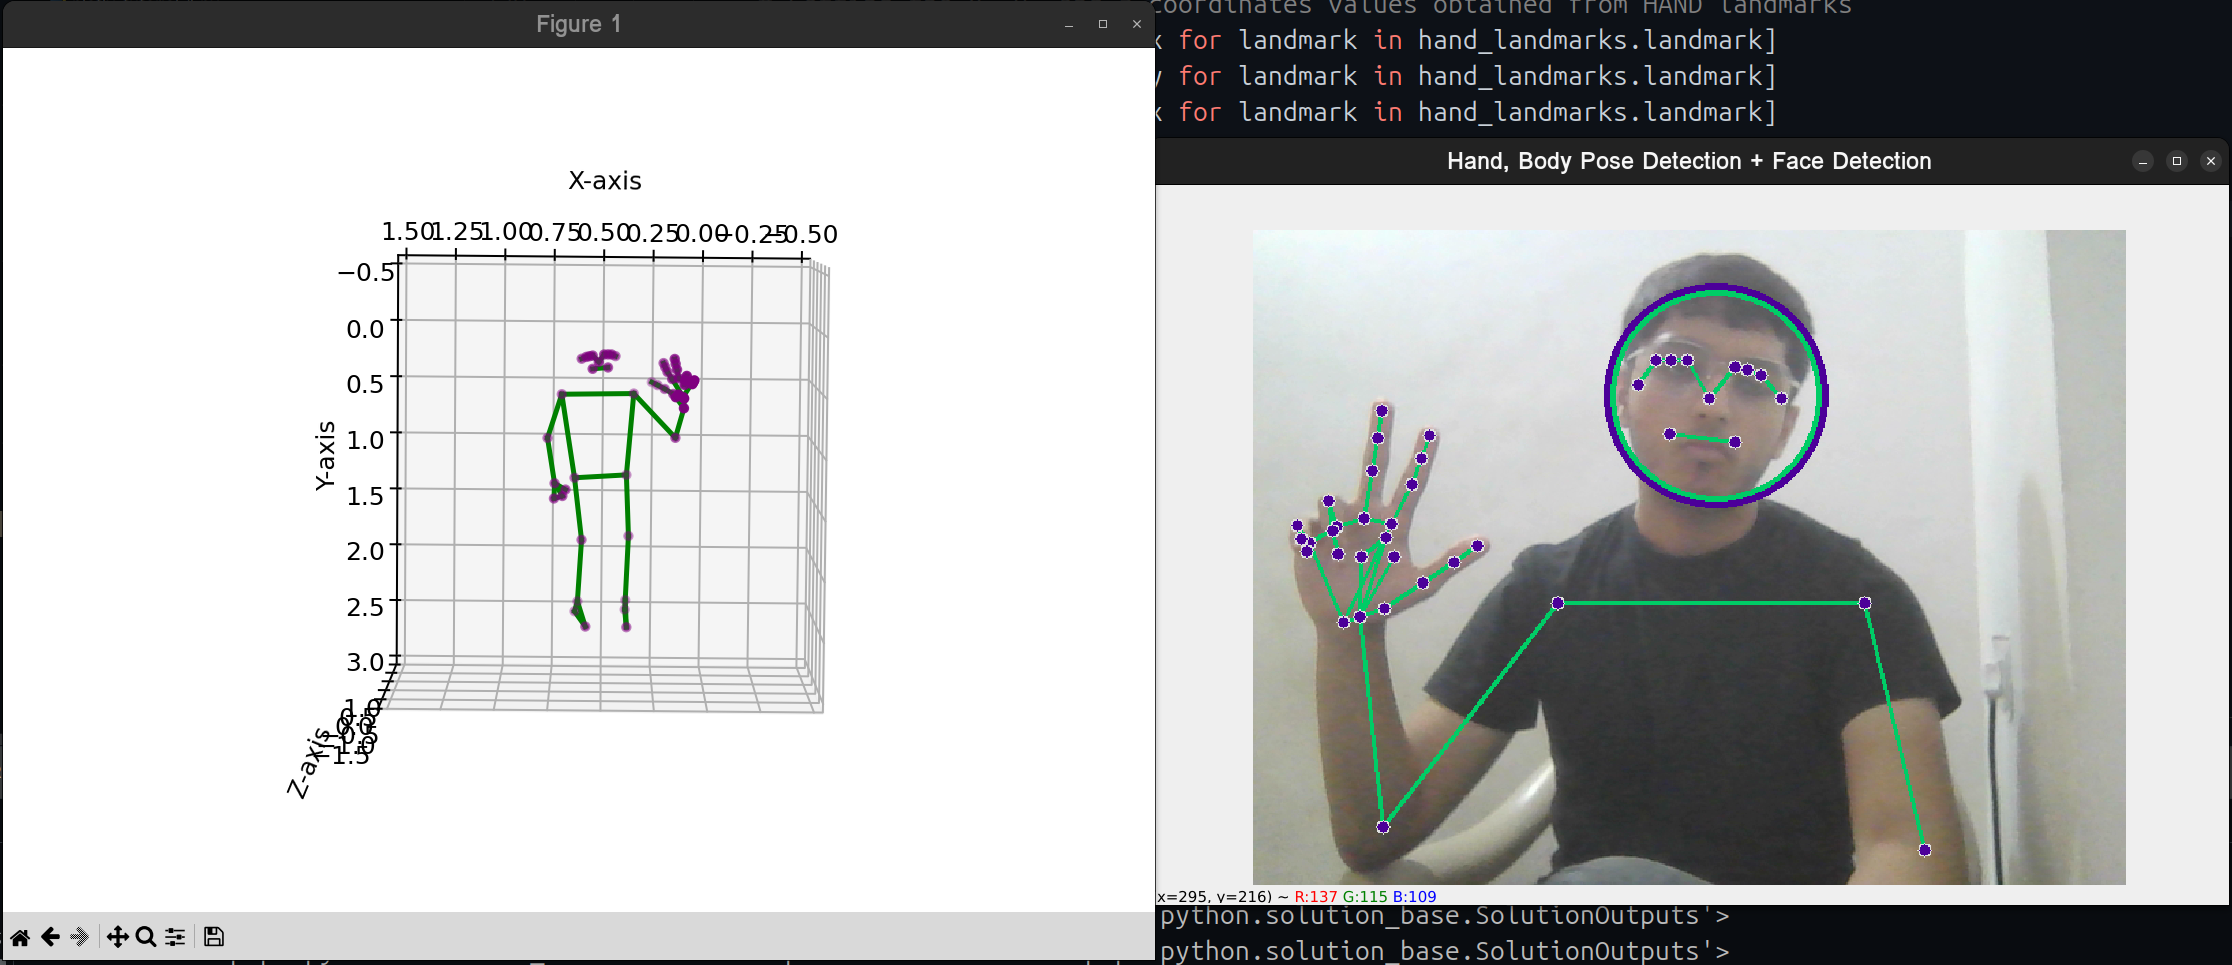

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           🌀 Still in Progress to enhance, detect more than 1 instance(human pose) and make it even more accurate
</h1>
</div>

<div style="background-color: white;
            border-radius: 7px;
            border-style: solid;">
    
<h1 style="text-align: center;
           font-size: 30px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
           If you find this notebook helpful, you can upvote it :)
</h1>
</div>